In [381]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [382]:
# Read in the image
image = mpimg.imread('test.jpg')

In [383]:
# Grab the x and y size 
ysize = image.shape[0]
xsize = image.shape[1]
color_channels = len(image[0][0])
"This image is {} pixels high, {} pixel wide and has {} color channels.".format(ysize, xsize, color_channels)

'This image is 720 pixels high, 1280 pixel wide and has 3 color channels.'

In [384]:
# and make a copy of the image
color_select = np.copy(image)
line_image = np.copy(image)
color_select_bis = np.copy(image)
line_image_bis = np.copy(image)

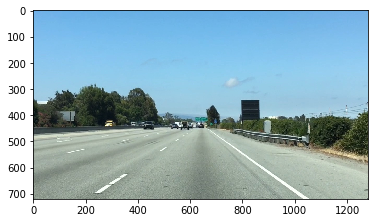

In [385]:
plt.imshow(color_select)

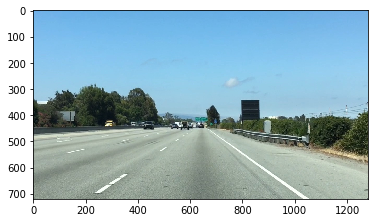

In [386]:
plt.imshow(line_image)

### Defining color filter here

In [387]:
# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

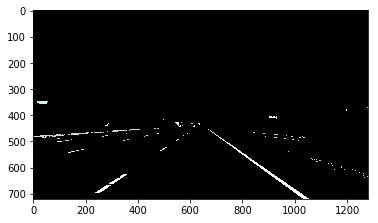

In [388]:
# Filter color channels so each is inferior to set threshold for itself
# Then set pixels to 0,0,0 all black where pixels match criteria
# Display Image
color_thresholds_bis = (image[:,:,0] < rgb_threshold[0]) | (image[:,:,1] < rgb_threshold[1]) | (image[:,:,2] < rgb_threshold[2])
color_select_bis[color_thresholds_bis] = [0, 0, 0]
plt.imshow(color_select_bis)

### Define area of interest

In [402]:
# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION 
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [-100, 725]
right_bottom = [1500, 725]
apex = [650, 450]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

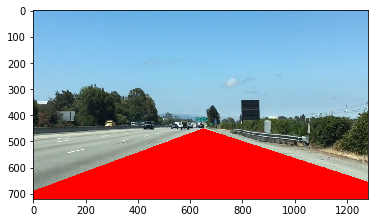

In [403]:
# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & (YY > (XX*fit_right[0] + fit_right[1])) & (YY < (XX*fit_bottom[0] + fit_bottom[1]))
line_image_bis[region_thresholds] = [255, 0, 0]
plt.imshow(line_image_bis)

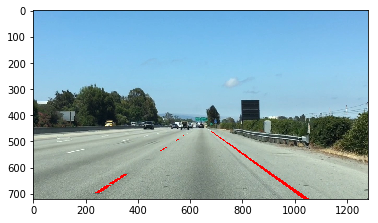

In [404]:
# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | (image[:,:,1] < rgb_threshold[1]) | (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & (YY > (XX*fit_right[0] + fit_right[1])) & (YY < (XX*fit_bottom[0] + fit_bottom[1]))                   

# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]
# print image
plt.imshow(line_image)